<a href="https://colab.research.google.com/github/vishnurapps/Stocastic-Gradient-Descent-Implementation/blob/master/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [0]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split

## Loading data

In [2]:
boston_data=pd.DataFrame(data = load_boston().data, columns = load_boston().feature_names)
boston_data['Price'] = load_boston().target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_data.shape

(506, 14)

There are 506 rows and 14 columns

In [4]:
y = boston_data['Price']
X = boston_data.drop(['Price'], axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3)

## Standardization

In [0]:
scaler = preprocessing.StandardScaler().fit(XTrain)
XTrain = scaler.transform(XTrain)
XTest = scaler.transform(XTest)

## Buildin Stocastic Gradient Descent

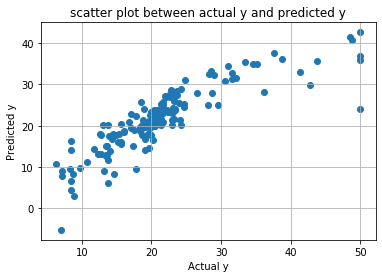

Mean Squared Error : 21.064716216392185
Mean Absolute Error : 3.169294019843756


In [7]:
# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(XTrain, yTrain)
plt.scatter(yTest,clf_.predict(XTest))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(yTest, clf_.predict(XTest)))
print('Mean Absolute Error :',mean_absolute_error(yTest, clf_.predict(XTest)))

### weight matrix from builtin model

In [8]:
sklearn_w=clf_.coef_
sklearn_w

array([-1.19753496,  0.99426134, -0.31715436,  0.86671941, -1.93902721,
        2.66889767,  0.04675123, -3.09313125,  1.98884572, -1.1565953 ,
       -1.99676421,  0.85374524, -3.61445474])

## Custom implementation

In [0]:
# implemented SGD Classifier
def CustomGradientDescentRegressor(X, y ,learning_rate=0.001,n_itr=1000,k=10):
    w_cur=np.zeros(shape=(1,X.shape[1])) #one row columns = number of columns -1 beacuse dataframe contains output as well
    b_cur=0                                         #b current is set to zero
    cur_itr=1                                       #current iteration is set to zero
    for i in range (n_itr):
        w_old=w_cur                                                        #last value is stored
        b_old=b_cur
        w_temp=np.zeros(shape=(1,X.shape[1]))                   #resetting value of w and b
        b_temp=0
        indices = np.random.permutation(X.shape[0])
        x = X[indices]
        y = X[indices]
        #temp=train_data.sample(k)                                          #taking a sample from the whole training data
        #y=np.array(temp['price'])                                          #extracting the price
        #x=np.array(temp.drop('price',axis=1))                              #dropping the price
        for i in range(k):                                                 #iterating batchnumber times
            w_temp+=x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)          #processing x * (y - predicted) * (-2/k)
            b_temp+=(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)               #processing (y - predicted) * (-2/k)
        w_cur=w_old-learning_rate*w_temp                                   #calculating the w_cur
        b_cur=b_old-learning_rate*b_temp
        learning_rate = learning_rate/2
        if(w_old==w_cur).all():                                            #checking if converged
            break
        cur_itr+=1                                                         #incrementing iteration
    return w_cur,b_cur                                                     #returning value
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [0]:
# running implemented SGD Classifier with obtained optimal learning rate
w,b=CustomGradientDescentRegressor(XTrain, yTrain, learning_rate=0.5,n_itr=10000)
#y_pred=predict(XTest,w,b)
#plot_(yTest,y_pred)

In [11]:
w

array([[ 3.92609016,  1.56283453,  1.80047131,  1.75557733,  0.36277406,
         1.40510043,  0.25405109,  2.66104611, -0.13534393, -0.11718371,
         0.84261758,  4.96902198,  1.02747931]])